In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

In [11]:
# read the data
data = pd.read_csv("combine_test_data.csv")
test_data = data.sample(frac=1).reset_index(drop=True)
# split the dataset and make the train and test data sets
X = test_data.drop(['label'],axis=1).values
y = test_data['label'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

## Init State

In [12]:
# copy data
X_train1 = X_train.copy()
X_test1 = X_test.copy()
y_train1 = y_train.copy()
y_test1 = y_test.copy()

# make XGB model
xgb1 = xgb.XGBClassifier(objective='binary:logistic',
                                learning_rate=0.4,
                                max_depth=7,
                                )
#fit the model
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
#predicting the target value from the model for the samples
all_preds = xgb1.predict(X_test1)
y_train_xgb = xgb1.predict(X_train1)

#computing the accuracy of the model performance
all_targets = y_test1
acc_train_xgb = accuracy_score(y_train1,y_train_xgb)
acc_test_xgb = accuracy_score(all_targets,all_preds)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.971
XGBoost : Accuracy on test Data: 0.943


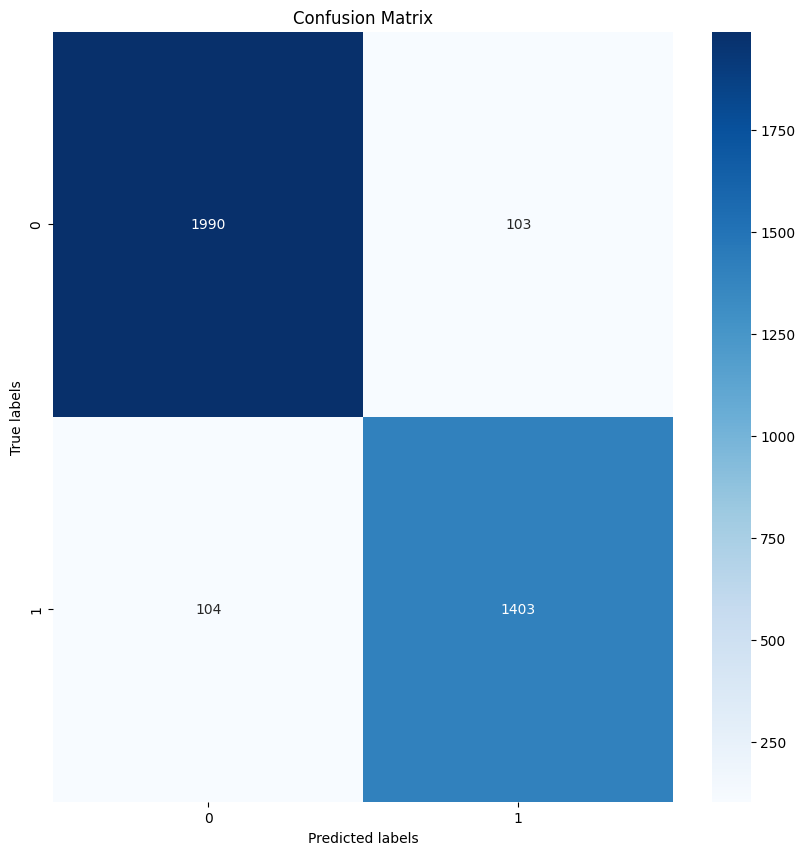

In [14]:
# make confusion matrix
conf_mat = confusion_matrix(all_targets, all_preds)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

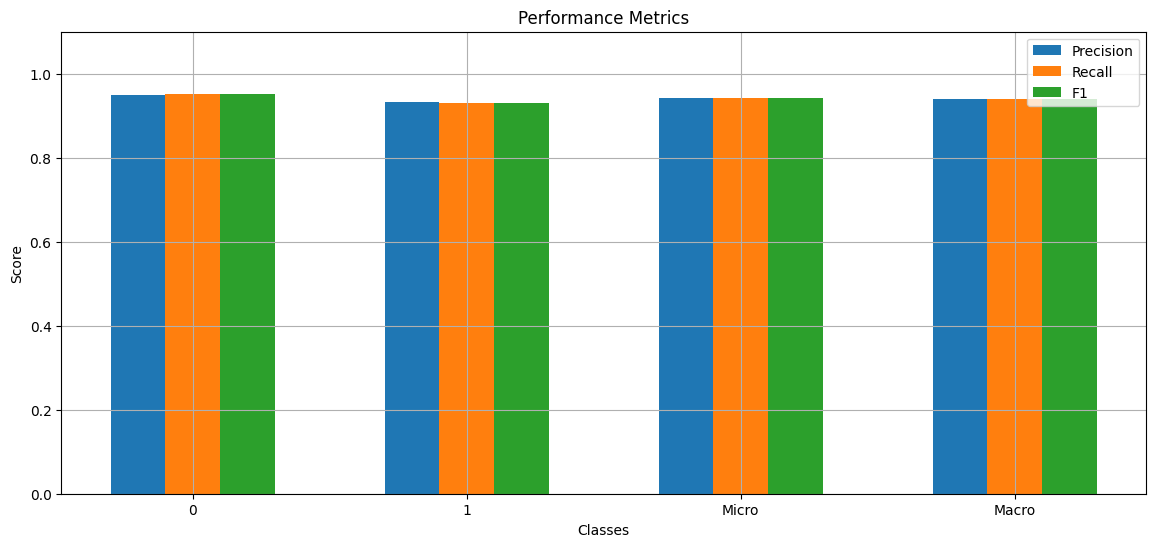

In [15]:
accuracy = accuracy_score(all_targets, all_preds)
num_classes = 2

# make performance metrics for each classes
# define the values in normal, micro and macro state
precision = precision_score(all_targets, all_preds, average=None)
precision_micro = precision_score(all_targets, all_preds, average='micro')
precision_macro = precision_score(all_targets, all_preds, average='macro')

recall = recall_score(all_targets, all_preds, average=None)
recall_micro = recall_score(all_targets, all_preds, average='micro')
recall_macro = recall_score(all_targets, all_preds, average='macro')

f1 = f1_score(all_targets, all_preds, average=None)
f1_micro = f1_score(all_targets, all_preds, average='micro')
f1_macro= f1_score(all_targets, all_preds, average='macro')

precision = np.append(precision, [precision_micro, precision_macro])
recall = np.append(recall, [recall_micro, recall_macro])
f1 = np.append(f1, [f1_micro, f1_macro])
classes = list(range(num_classes)) + ['Micro', 'Macro']

x = np.arange(len(classes))
width = 0.2

fig1, ax1 = plt.subplots(figsize=(14, 6))
rects1 = ax1.bar(x - width, precision, width, label='Precision')
rects2 = ax1.bar(x, recall, width, label='Recall')
rects3 = ax1.bar(x + width, f1, width, label='F1')
# make performance diagram
ax1.set_xlabel('Classes')
ax1.set_ylabel('Score')
ax1.set_title('Performance Metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(classes)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper right')
ax1.grid(True)
plt.show()

## Use GridSearchCV to find best parameter

In [7]:
# copy data
X_train2 = X_train.copy()
X_test2 = X_test.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

# define model
xgb_model = XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.4,0.8],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12]
}

# set GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=3)

# Fit GridSearchCV model
grid_search.fit(X_train2, y_train2)

# print best parameter
print("Best parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END .learning_rate=0.0001, max_depth=1;, score=0.584 total time=   0.0s
[CV 2/5] END .learning_rate=0.0001, max_depth=1;, score=0.584 total time=   0.0s
[CV 3/5] END .learning_rate=0.0001, max_depth=1;, score=0.584 total time=   0.0s
[CV 4/5] END .learning_rate=0.0001, max_depth=1;, score=0.584 total time=   0.0s
[CV 5/5] END .learning_rate=0.0001, max_depth=1;, score=0.584 total time=   0.0s
[CV 1/5] END .learning_rate=0.0001, max_depth=2;, score=0.584 total time=   0.0s
[CV 2/5] END .learning_rate=0.0001, max_depth=2;, score=0.584 total time=   0.0s
[CV 3/5] END .learning_rate=0.0001, max_depth=2;, score=0.584 total time=   0.0s
[CV 4/5] END .learning_rate=0.0001, max_depth=2;, score=0.584 total time=   0.0s
[CV 5/5] END .learning_rate=0.0001, max_depth=2;, score=0.584 total time=   0.0s
[CV 1/5] END .learning_rate=0.0001, max_depth=3;, score=0.584 total time=   0.0s
[CV 2/5] END .learning_rate=0.0001, max_depth=

In [16]:
# make XGB model
xgb2 = xgb.XGBClassifier(objective='binary:logistic',
                                learning_rate=0.4,
                                max_depth=10,
                                )
#fit the model
xgb2.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
#predicting the target value from the model for the samples
all_preds1 = xgb2.predict(X_test2)
y_train_xgb1 = xgb2.predict(X_train2)

#computing the accuracy of the model performance
all_targets1 = y_test2
acc_train_xgb1 = accuracy_score(y_train2,y_train_xgb1)
acc_test_xgb1 = accuracy_score(all_targets1,all_preds1)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb1))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb1))

XGBoost: Accuracy on training Data: 0.975
XGBoost : Accuracy on test Data: 0.940
